In [1]:
import pandas as pd
import tsp
import plot
import cluster
import matplotlib.pyplot as plt

In [2]:
# Leer puntos
data = pd.read_csv("../data/tsp.csv")
all_points = data.iloc[:, :2].values

In [4]:
# Agrupar en clusters
points_clusters = cluster.group_points_kmeans(all_points, n_clusters=7)
# Halla matrices distancia
dists_matrix_clusters = [tsp.calc_dist_matrix(c_points) for c_points in points_clusters]

In [5]:
# Halla la solución de cada uno
sols_clusters = [
    tsp.opt_tsp_model(dist_matrix) for dist_matrix in dists_matrix_clusters
]

Academic license - for non-commercial use only - expires 2021-04-29
Using license file C:\Users\BBD\gurobi.lic
Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 194 rows, 18721 columns and 37442 nonzeros
Model fingerprint: 0xc1cea007
Variable types: 0 continuous, 18721 integer (18721 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+03, 6e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.02s
Presolved: 194 rows, 18721 columns, 37442 nonzeros
Variable types: 0 continuous, 18721 integer (18721 binary)

Root relaxation: objective 3.703075e+06, 296 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

   

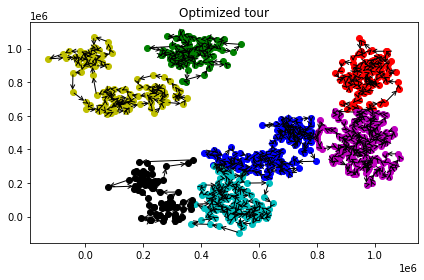

In [7]:
# Muestra solucion
colors = ["b", "g", "r", "c", "m", "y", "k"]
for c_points, c_sol, c_color in zip(points_clusters, sols_clusters, colors):
    plot.plot_solution(c_points, c_sol, c_color)
plt.show()